In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")
calendar = pd.read_csv("calendar.csv")

In [3]:
listings.head(20)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,20168,https://www.airbnb.com/rooms/20168,20201009050447,2020-10-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.63
2,25428,https://www.airbnb.com/rooms/25428,20201009050447,2020-10-11,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20201009050447,2020-10-10,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.05
4,28871,https://www.airbnb.com/rooms/28871,20201009050447,2020-10-10,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.72
5,29051,https://www.airbnb.com/rooms/29051,20201009050447,2020-10-10,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,9.0,NaN,f,2,0,2,0,4.13
6,31080,https://www.airbnb.com/rooms/31080,20201009050447,2020-10-13,2-story apartment + rooftop terrace,<b>The space</b><br />My apartment is light an...,NaN,https://a0.muscache.com/pictures/5400242/371a2...,133488,https://www.airbnb.com/users/show/133488,...,10.0,9.0,9.0,NaN,f,1,1,0,0,0.29
7,41125,https://www.airbnb.com/rooms/41125,20201009050447,2020-10-11,Amsterdam Center Entire Apartment,"<b>The space</b><br />A nice, sunny and spacio...",NaN,https://a0.muscache.com/pictures/c632c4e8-48fd...,178515,https://www.airbnb.com/users/show/178515,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.74
8,43109,https://www.airbnb.com/rooms/43109,20201009050447,2020-10-14,Oasis in the middle of Amsterdam,<b>The space</b><br />Welcome to my beautiful....,You almost can't be more central then this.,https://a0.muscache.com/pictures/241908/ec20bf...,188098,https://www.airbnb.com/users/show/188098,...,10.0,10.0,9.0,NaN,f,1,1,0,0,5.03
9,44129,https://www.airbnb.com/rooms/44129,20201009050447,2020-10-10,Luxury design with canal view,"Welcome to my little gem<br /><br />Cozy, brig...",The Jordaan is possibly the most famous neighb...,https://a0.muscache.com/pictures/50719680/fc81...,187728,https://www.airbnb.com/users/show/187728,...,10.0,10.0,9.0,NaN,f,5,5,0,0,1.43


In [4]:
listings.shape

(18782, 74)

### 1.1 Selecting the Features 

In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
df = listings.copy()

NOTE!

After carefully inspecting all the Features of the listings.csv dataset, we concluded that the following "selected_features"
may affect the price of the listing.



In [7]:
selected_features = ["minimum_nights","minimum_minimum_nights","host_is_superhost","host_has_profile_pic",
                     "host_identity_verified","latitude","longitude","neighbourhood_cleansed",
                    "room_type", "accommodates","bedrooms","beds","amenities","reviews_per_month","instant_bookable","price"]

In [8]:
df.drop(listings.columns.difference(selected_features), 1, inplace=True)

In [9]:
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,minimum_minimum_nights,instant_bookable,reviews_per_month
0,t,t,t,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,2,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,3,t,1.98
1,f,t,t,Centrum-Oost,52.36424,4.89396,Private room,2,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,4,t,2.63
2,t,t,f,Centrum-West,52.37297,4.88339,Entire home/apt,3,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,14,f,0.15
3,t,t,t,Centrum-West,52.38761,4.89188,Private room,2,1.0,1.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$138.00,2,2,t,2.05
4,t,t,t,Centrum-West,52.36719,4.89092,Private room,2,1.0,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$75.00,2,2,f,2.72


### 1.2 Convert the type of some features

#### 1.2.1 Converting "price" Feature data type

In [10]:
df["price"].dtype

dtype('O')

In [11]:
#  Convert "price" data type from Object to Float

df["price"] = df["price"].str.replace('[\$\,]|\.\d*', '').astype(float)

#### 1.2.2 Converting "amenities" Feature to "num_amenities"

In [12]:
df["amenities"]

0        ["Laptop-friendly workspace", "Coffee maker", ...
1        ["Laptop-friendly workspace", "TV", "Carbon mo...
2        ["Laptop-friendly workspace", "Kitchen", "Dish...
3        ["Laptop-friendly workspace", "Coffee maker", ...
4        ["Carbon monoxide alarm", "Private entrance", ...
                               ...                        
18777    ["TV", "Kitchen", "Carbon monoxide alarm", "Wi...
18778    ["Laptop-friendly workspace", "Kitchen", "Carb...
18779    ["Essentials", "Paid parking off premises", "R...
18780    ["Dryer", "Essentials", "Hangers", "Laptop-fri...
18781    ["Laptop-friendly workspace", "Kitchen", "Dish...
Name: amenities, Length: 18782, dtype: object

In [13]:
''' 

The "amenities" Feature contains a list of all the available amenities provided by the listing.
The format of the values are extremely time consuming to interpet, due to its format.

In order to extract some imformation that may be beneficial for the model, the number of the amenities were extracted
so that theoritically, a listing with more amenities provided, would have a higher price.

The above task was done with the following code

'''


all_amenities_rows = []         
amenities = []                 
amenities_number = []           

for i in range( df.shape[0] ):
    i_list = df['amenities'][i].strip('][').split(', ')
    amenities.append( i_list )
    amenities_number.append( len(i_list) )
    for j in range( len( i_list ) ):  
        tmp = i_list[j][1:-1]            
        all_amenities_rows.append( tmp )

In [14]:
df["amenities_number"] = amenities_number
df["amenities_number"].head()

0    26
1    17
2    29
3    24
4    15
Name: amenities_number, dtype: int64

In [15]:
#  Dropping the original "amenities" Feature

df.drop(labels = "amenities", axis = 1, inplace = True )

### 1.3 Examine the missing values

In [16]:
df.isnull().sum()

host_is_superhost           56
host_has_profile_pic        56
host_identity_verified      56
neighbourhood_cleansed       0
latitude                     0
longitude                    0
room_type                    0
accommodates                 0
bedrooms                   988
beds                        93
price                        0
minimum_nights               0
minimum_minimum_nights       0
instant_bookable             0
reviews_per_month         2290
amenities_number             0
dtype: int64

In [17]:
df.shape

(18782, 16)

#### 1.3.1 Dropping rows with NaN values

In [18]:
#  dropping "host_is_superhost", "host_has_profile_pic", "host_identity_verified" NaN values

df.dropna(subset= ["host_is_superhost", "host_has_profile_pic", "host_identity_verified"], inplace = True)

In [19]:
df.shape

(18726, 16)

#### 1.3.2 Filling NaN values - removing outliers

In [20]:
df["bedrooms"].value_counts(dropna = False)

1.0     11228
2.0      4423
3.0      1525
NaN       985
4.0       459
5.0        69
6.0        14
12.0        6
8.0         5
10.0        5
7.0         4
14.0        1
30.0        1
9.0         1
Name: bedrooms, dtype: int64

In [21]:
df.shape

(18726, 16)

In [22]:
#  Filling "bedroom" NaN values using .median()

df["bedrooms"].fillna(df["bedrooms"].median(), inplace = True)

In [23]:
# Removing listings with "bedrooms" value more than 6
  
df = df[df['bedrooms']<=6].copy()


In [24]:
#  Filling "beds" 0.0 and NaN values with the number of "accomodates"

df["beds"] = np.where(df["beds"]== 0 , df["accommodates"], df["beds"])

df["beds"] = np.where(df["beds"].isna() , df["accommodates"], df["beds"])

In [25]:
df["beds"].value_counts()

1.0     10191
2.0      5058
3.0      1751
4.0      1116
5.0       319
6.0       174
8.0        31
7.0        26
12.0        9
10.0        6
18.0        4
16.0        4
11.0        3
14.0        3
9.0         2
17.0        2
13.0        2
15.0        1
20.0        1
Name: beds, dtype: int64

In [26]:
# Removing listings with "beds" value more than 9
 
df = df[df['beds']<=9].copy()


In [27]:
df["beds"].value_counts()

1.0    10191
2.0     5058
3.0     1751
4.0     1116
5.0      319
6.0      174
8.0       31
7.0       26
9.0        2
Name: beds, dtype: int64

In [28]:
#  Filling "reviews_per_month" NaN values using the .median()

df["reviews_per_month"].fillna(df["reviews_per_month"].median(), inplace = True)

In [29]:
df.isna().sum()

host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
minimum_minimum_nights    0
instant_bookable          0
reviews_per_month         0
amenities_number          0
dtype: int64

### 1.4 One-Hot Encoding   -   Dealing with categorical variables

In [30]:
oh_df = pd.get_dummies(data = df, drop_first = True)
oh_df

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,minimum_minimum_nights,reviews_per_month,amenities_number,...,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t
0,52.36575,4.94142,2,1.0,2.0,59.0,3,3,1.98,26,...,0,0,0,0,0,0,0,1,0,1
1,52.36424,4.89396,2,1.0,1.0,236.0,1,4,2.63,17,...,0,0,0,0,0,0,0,1,0,1
2,52.37297,4.88339,3,1.0,1.0,125.0,14,14,0.15,29,...,0,0,0,0,0,0,0,0,0,0
3,52.38761,4.89188,2,1.0,1.0,138.0,2,2,2.05,24,...,0,0,0,0,0,0,0,1,0,1
4,52.36719,4.89092,2,1.0,1.0,75.0,2,2,2.72,15,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,52.37642,4.84941,4,1.0,2.0,137.0,1,1,0.33,9,...,0,0,0,0,0,0,0,0,0,1
18778,52.39042,4.88204,1,2.0,1.0,120.0,5,5,0.33,11,...,0,0,0,0,1,0,0,0,0,0
18779,52.34306,4.89995,2,1.0,1.0,20.0,1,1,0.33,20,...,0,0,0,0,0,0,0,1,0,0
18780,52.34885,4.91878,2,1.0,2.0,33.0,10,10,0.33,9,...,0,0,0,1,0,0,0,0,0,0


# 2. Modelling 

## 2.1 Formatting Dataset - Defining "Features" and "Labels"

In [31]:
''' 

At this stage, the "price" column is defined as the "Label" of the model and the remaining columns as the "Features"

'''

y = oh_df["price"]
X = oh_df.drop(['price'], axis=1)

## 2.2 Train - Test Split

In [32]:
''' 

The dataset is split to Train and Test, in order to evaluate the efficiency of the model 

'''


from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=1)

## 2.3 Feature Scaling

'''

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values
is 0 and the standard deviation is 1.

'''

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

ss_x_tr = sc.fit_transform(x_tr)
ss_x_ts = sc.transform(x_ts)

## 2.4  Linear Regression Model 1.0

In [35]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(ss_x_tr, y_tr)

LinearRegression()

In [36]:
y_lin = lin.predict(ss_x_ts)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Linear Regressor 1.0 Mean Absolute Error: {}'.format(mean_absolute_error(y_ts, y_lin)))
print('Linear Regressor 1.0 Mean Squared Error:  {}'.format(mean_squared_error(y_ts, y_lin)))

Linear Regressor 1.0 Mean Absolute Error: 53.87009962496249
Linear Regressor 1.0 Mean Squared Error:  32531.92664222515


## 3.  Evaluating the model's output

The mean absolute error is 52.4 which is rather high for a prediction of the listing's price.

In the following diagram we examine the distribution of the price

In [38]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

Checking the statistical distribution of prices
count    18668.000000
mean       154.405882
std        146.971485
min          5.000000
25%         95.000000
50%        129.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 154.41 and sigma = 146.97



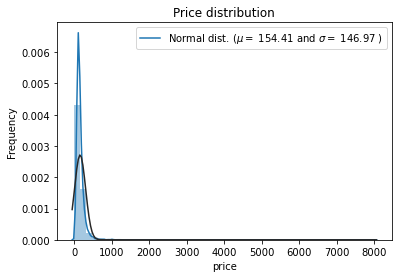

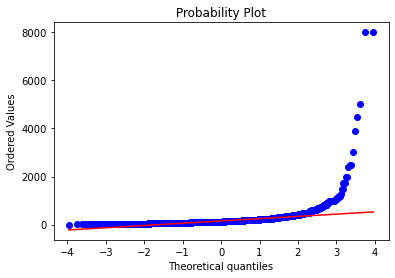

In [39]:
check_dist(df['price'])

It can be easily noted that the distribution of price is highly skewed.

In addition, the 75% of prices are up to 180.00 $ and there are clearly some outliers that may affect our model's precision


In [40]:
#   df.to_csv (r'C:\Users\Home1\Desktop\Project\Model_1.csv', index = False, header=True)

## 4. Re-examining the model

### 4.1 Normalizing the distribution of price by removing outliers

The initial model had a high Mean Absolute Error due to some outliers of the price

By examining we listings with "price" > 300$ it is easily noted why the model fails to predict accurately

In [41]:
mask = df["price"] > 300
df[mask]

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,minimum_minimum_nights,instant_bookable,reviews_per_month,amenities_number
28,f,t,f,Bos en Lommer,52.38459,4.85463,Entire home/apt,4,2.0,1.0,750.0,30,30,f,0.33,7
30,f,t,t,Centrum-Oost,52.36225,4.90200,Entire home/apt,4,3.0,6.0,450.0,4,4,f,0.23,24
90,f,t,t,Centrum-Oost,52.36961,4.90982,Entire home/apt,4,2.0,2.0,385.0,4,4,f,0.10,8
95,f,t,f,De Pijp - Rivierenbuurt,52.35420,4.89160,Entire home/apt,4,1.0,1.0,8000.0,30,30,f,0.08,7
140,f,t,f,IJburg - Zeeburgereiland,52.36076,4.98876,Entire home/apt,4,3.0,3.0,395.0,7,7,f,0.05,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18680,f,t,t,Centrum-Oost,52.36479,4.88033,Entire home/apt,4,2.0,2.0,325.0,7,5,t,0.33,14
18689,f,t,t,Osdorp,52.37654,4.76571,Entire home/apt,8,4.0,5.0,1750.0,1,1,t,0.33,11
18698,t,t,t,Zuid,52.35270,4.86701,Entire home/apt,4,2.0,2.0,316.0,3,3,f,0.33,30
18729,f,t,t,De Baarsjes - Oud-West,52.36070,4.86890,Entire home/apt,4,2.0,2.0,995.0,3,3,f,0.33,33


We conclude that the high prices of these listings are not explained by our available data.

As, a result an easy approach is to exclude these high priced listings for our model and check again the distribution

In [42]:
df.shape

(18668, 16)

In [43]:
df_cleaned = df[df["price"]<=300].copy()
df_cleaned

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,minimum_minimum_nights,instant_bookable,reviews_per_month,amenities_number
0,t,t,t,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,2,1.0,2.0,59.0,3,3,t,1.98,26
1,f,t,t,Centrum-Oost,52.36424,4.89396,Private room,2,1.0,1.0,236.0,1,4,t,2.63,17
2,t,t,f,Centrum-West,52.37297,4.88339,Entire home/apt,3,1.0,1.0,125.0,14,14,f,0.15,29
3,t,t,t,Centrum-West,52.38761,4.89188,Private room,2,1.0,1.0,138.0,2,2,t,2.05,24
4,t,t,t,Centrum-West,52.36719,4.89092,Private room,2,1.0,1.0,75.0,2,2,f,2.72,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,f,t,t,Bos en Lommer,52.37642,4.84941,Entire home/apt,4,1.0,2.0,137.0,1,1,t,0.33,9
18778,f,t,f,Westerpark,52.39042,4.88204,Entire home/apt,1,2.0,1.0,120.0,5,5,f,0.33,11
18779,f,t,f,De Pijp - Rivierenbuurt,52.34306,4.89995,Private room,2,1.0,1.0,20.0,1,1,f,0.33,20
18780,f,t,f,Watergraafsmeer,52.34885,4.91878,Entire home/apt,2,1.0,2.0,33.0,10,10,f,0.33,9


In [44]:
df_cleaned.shape

(17656, 16)

Approximately 1000 listings were removed, and the price distribution of the new DataFrame is presented below

Checking the statistical distribution of prices
count    17656.000000
mean       134.994959
std         59.740558
min          5.000000
25%         90.000000
50%        125.000000
75%        170.000000
max        300.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 134.99 and sigma = 59.74



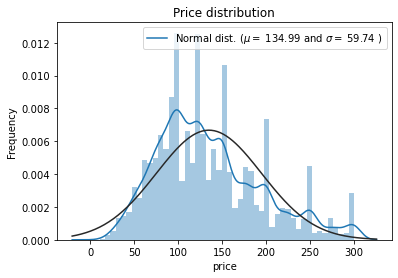

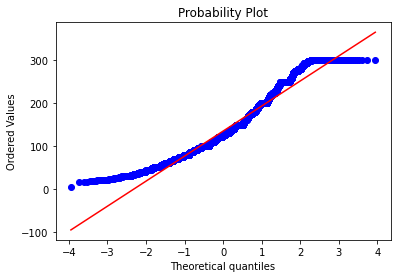

In [45]:
check_dist(df_cleaned['price'])

It is easily noted that the distribution of the price has become more Normalized than the initial Dataset.

Therefore, it is expected that the new model would predict more accurately the prices of the listings

## 4.2  Linear Regression Model 2.0

In [46]:
oh_df2 = pd.get_dummies(data = df_cleaned, drop_first = True)
oh_df2.head()

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,minimum_minimum_nights,reviews_per_month,amenities_number,...,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t
0,52.36575,4.94142,2,1.0,2.0,59.0,3,3,1.98,26,...,0,0,0,0,0,0,0,1,0,1
1,52.36424,4.89396,2,1.0,1.0,236.0,1,4,2.63,17,...,0,0,0,0,0,0,0,1,0,1
2,52.37297,4.88339,3,1.0,1.0,125.0,14,14,0.15,29,...,0,0,0,0,0,0,0,0,0,0
3,52.38761,4.89188,2,1.0,1.0,138.0,2,2,2.05,24,...,0,0,0,0,0,0,0,1,0,1
4,52.36719,4.89092,2,1.0,1.0,75.0,2,2,2.72,15,...,0,0,0,0,0,0,0,1,0,0


In [47]:
y2 = oh_df2["price"]
X2 = oh_df2.drop(['price'], axis=1)

In [48]:
from sklearn.model_selection import train_test_split

x_tr2, x_ts2, y_tr2, y_ts2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [49]:
sc2 = StandardScaler()

ss_x_tr2 = sc.fit_transform(x_tr2)
ss_x_ts2 = sc.transform(x_ts2)

In [50]:
lin2 = LinearRegression()

lin2.fit(ss_x_tr2, y_tr2)

LinearRegression()

In [51]:
y_lin2 = lin2.predict(ss_x_ts2)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Linear Regressor 2.0 Mean Absolute Error: {}'.format(mean_absolute_error(y_ts2, y_lin2)))
print('Linear Regressor 2.0 Mean Squared Error:  {}'.format(mean_squared_error(y_ts2, y_lin2)))

Linear Regressor 2.0 Mean Absolute Error: 35.39684191847106
Linear Regressor 2.0 Mean Squared Error:  2111.2723122810357


In [53]:
#  df_cleaned.to_csv (r'C:\Users\Home1\Desktop\Project\Model_2.csv', index = False, header=True)

## 4.3 Interpreting The Results

The Mean Absolute Error of the Linear Regressor 2.0 has dropped to 34.9 dollars , which is a huge improvement
over the initial model which had  52.4 dollars.

We can safely say that by removing more price outliers the accuracy of the model would further increase,
but the idea is to remove as little outliers as possible, and at the same time achieve a high accuracy.
This is something that the Linear Regressor 2.0 achieves.

## 5.0 Examining other Regression Models

## 5.1 K-Nearest Neighbors Regression

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [55]:
for i in range(5,45,5):

  k = i 

  KN = KNeighborsRegressor( n_neighbors = k )

  KN.fit(ss_x_tr2,y_tr2)

  y_pred_KN = KN.predict(ss_x_ts2)

  KN2 = KNeighborsRegressor( n_neighbors = k, weights = 'distance' )

  KN2.fit(ss_x_tr2,y_tr2)

  y_pred_KN2 = KN2.predict(ss_x_ts2)

  print('KNeighbors,  k = {},  uniform weighs MAE: {:.2f},   distance weights MAE: {:.2f}'.format( k, mean_absolute_error(y_ts2, y_pred_KN), mean_absolute_error(y_ts2, y_pred_KN2) ) ) 

KNeighbors,  k = 5,  uniform weighs MAE: 37.24,   distance weights MAE: 37.08
KNeighbors,  k = 10,  uniform weighs MAE: 36.50,   distance weights MAE: 36.17
KNeighbors,  k = 15,  uniform weighs MAE: 36.13,   distance weights MAE: 35.76
KNeighbors,  k = 20,  uniform weighs MAE: 36.09,   distance weights MAE: 35.65
KNeighbors,  k = 25,  uniform weighs MAE: 36.14,   distance weights MAE: 35.66
KNeighbors,  k = 30,  uniform weighs MAE: 36.20,   distance weights MAE: 35.70
KNeighbors,  k = 35,  uniform weighs MAE: 36.20,   distance weights MAE: 35.68
KNeighbors,  k = 40,  uniform weighs MAE: 36.28,   distance weights MAE: 35.72


## 5.2 Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor

amsterdam_airbnb_model = DecisionTreeRegressor(random_state = 42)

amsterdam_airbnb_model.fit(ss_x_tr2, y_tr2)

DecisionTreeRegressor(random_state=42)

In [57]:
predictions = amsterdam_airbnb_model.predict(ss_x_ts2)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('linear regressor mean absolute error: {}'.format(mean_absolute_error(y_ts2, predictions)))
print('linear regressor mean squared error: {}'.format(mean_squared_error(y_ts2, predictions)))

linear regressor mean absolute error: 47.74556352652445
linear regressor mean squared error: 4069.917252690202


## 5.3 Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gbr = GradientBoostingRegressor(n_estimators=100)

In [61]:
gbr_model_full_data = gbr.fit(ss_x_tr, y_tr)

In [62]:
y_gbr = gbr.predict(ss_x_ts)

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mse: ', mean_squared_error(y_gbr, y_ts))
print('mean absolute error: ', mean_absolute_error(y_gbr, y_ts))

mse:  32428.47329977878
mean absolute error:  52.30591979318492


## 5.4 Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor(n_estimators=25)

rf.fit(ss_x_tr2, y_tr2)

y_pred2 = rf.predict(ss_x_ts2)
rf.score(ss_x_ts2,y_ts2)

0.4120138893882679

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mse: ', mean_squared_error(y_ts2, y_pred2))
print('mean absolute error: ', mean_absolute_error(y_ts2, y_pred2))

mse:  2114.6226178514294
mean absolute error:  35.114754658971385
